In [1]:
import pandas as pd
df = pd.read_csv('dataset/train/train.csv')

In [17]:
df['sentence'][0]

'〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.'

In [2]:
max([len(x.split(' ')) for x in df['sentence']]) # 다시 확인 필요

108

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import math
import matplotlib.pyplot as plt
torch.manual_seed(0)

def preprocessing_dataset(dataset):
  """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
  subject_entity = []
  object_entity = []
  for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    i = i[1:-1].split(',')[0].split(':')[1]
    j = j[1:-1].split(',')[0].split(':')[1]

    subject_entity.append(i)
    object_entity.append(j)
  out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],})
  return out_dataset

dataset = preprocessing_dataset(df)
dataset_size = len(dataset)
train_dataset, validation_dataset = random_split(dataset, [math.floor(dataset_size*0.8), math.ceil(dataset_size*0.2)])
print(f"dataset length is {len(dataset)}")
print(f"train dataset length is {len(train_dataset)}")
print(f"validation dataset length is {len(validation_dataset)}")

train_df = dataset.iloc[train_dataset.indices]
validation_df = dataset.iloc[train_dataset.indices]
train_df.to_csv('train.csv', index=False)
validation_df.to_csv('validation.csv', index=False)

dataset length is 32470
train dataset length is 25976
validation dataset length is 6494


In [4]:
dataset.value_counts(['label'])

label                              
no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          

<BarContainer object of 30 artists>

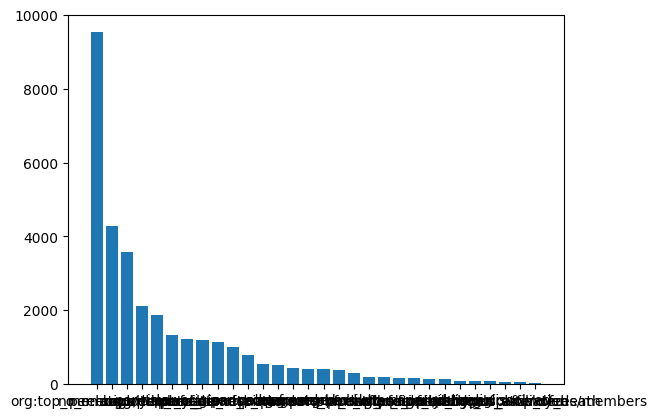

In [8]:
plt.bar(dataset['label'].value_counts().index, dataset['label'].value_counts().values)

In [6]:
train_df.value_counts(['label'])

label                              
no_relation                            7664
org:top_members/employees              3417
per:employee_of                        2803
per:title                              1680
org:member_of                          1490
org:alternate_names                    1076
per:origin                              982
org:place_of_headquarters               959
per:date_of_birth                       909
per:alternate_names                     818
per:spouse                              647
per:colleagues                          415
per:parents                             405
org:founded                             367
per:date_of_death                       344
org:members                             328
org:product                             290
per:children                            245
per:place_of_residence                  158
per:other_family                        146
org:founded_by                          134
per:place_of_birth                      

<BarContainer object of 30 artists>

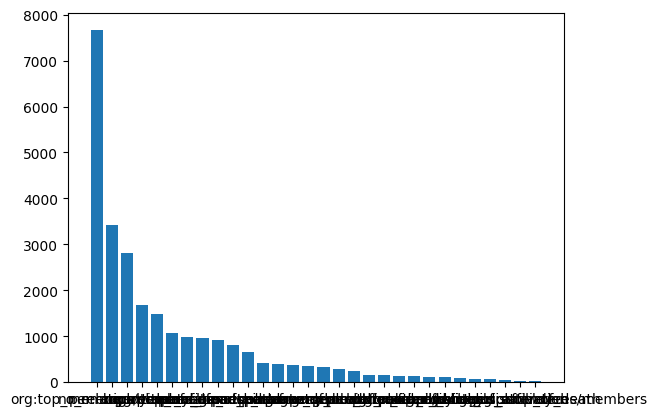

In [9]:
plt.bar(train_df['label'].value_counts().index, train_df['label'].value_counts().values)
print()